In [0]:
# https://www.tensorflow.org/tutorials/keras/text_classification?hl=ko
# 이 노트북은 영화 리뷰 텍스트를 긍정 또는 부정으로 분류
# 이와 같은 분류를 2진분류, (binary) 분류, 또는 클래스가 두 개인 분류
# 이진 분류는 머신러닝에서 중요하고 널리 사용
# 인터넷 영화 데이터베이스(Internat Movie Database)
# 텐서플로우와 함꼐 제공되는 IMDB 데이터셋 사용
# 데이터 갯수 총 50000개 , 
# 25000은 훈련용 25,000 개는 태스트용

In [0]:
# tensorflow 와 tk.keras 를 임포트 합니다.
import tensorflow as tf
from tensorflow import keras
# 핼퍼(helper) 라이브러리 임포트합니다.
# 시각화 작업이나 분석하기위한 숫자 라이브러리를 핼퍼라고 함
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 데이터셋 불러오기
# https://www.imdb.com/
# 이미 전처리도 다 끝나있고 정수 형으로 다 변환된 상태
# 각 정수는 어휘사전에 있는 특정 단어를 의미

imdb = keras.datasets.imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
# 가장 빈도수가 많은 노출단어를 설정해줄수 있다. 10000개만 뽑아오겠다.
# 내부가 파이썬 언어로 되어있기때문에 위의 방식으로 로드 해 올 수 있다.


In [0]:
## 데이터 탐색
# - 이 데이터셋의 샘플은 전처리된 정수 배열
# - 이 정수는 영화 리뷰에 나오는 단어를 나타냄
# - 레이블(label)은 정수 0 또는 1 이다.
# - 0은 부정적인 리뷰, 1은 긍정적인 리뷰.
print('훈련 샘플: {}, 레이블:{}'.format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블:25000


In [0]:
# 첫 번쨰 리뷰 확인해보기
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
# 신경망에 들어가려면 데이터 길이가 같아야 하는 데
# 리뷰는 각 데이터마다 구성 단어가 달라 길이가 다르기 때문에 처리해줘야 함
len(train_data[0]), len(train_data[1])
# 차이가 많이 나는것을 알 수 있다.

(218, 189)

In [0]:
# 정수로 된 단어들을 텍스트로 변환해보자.
# 정수와 문자열을 매핑한 딕셔너리(dictionary) 객체에 질의하는 헬퍼(helper) 함수를 만든다.
# 단어와 정수 인덱스를 매칭한 딕셔너리
word_index = imdb.get_word_index()
# 단어에 대한 인덱스 번호를 추출

# 처음 몇 개 인덱스는 사전에 정의되어 있다.
word_index = {k:(v+3) for k,v in word_index.items()}  #딕셔너리에서 키와 값을 꺼내는 items 에서 key(k)와 값(v)을 받는다.
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [0]:
# 이제 decode_review 함수를 사용해 첫 번쨰 리뷰 텍스트를 출력
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
# 데이터 준비
# 리뷰 정수 배열은 신경망에 주입하기 전에 텐서로 변환되어야 한다.

# 1.
# 원- 핫 인코딩(one-hot-encoding)은 정수 배열을 0과 1 로 이루어진 벡터로 변환
# 예를 들면 [3,5]를 인덱스가 3 과 5만 1이고 나머지는 모두 0 인 10000 처원 벡터로 변환할 수 있습니다.
# 그 다음 실수 벡터 데이터를 다룰 수 있는 층-Dense층 을 신경망의 첫 번째 쯩으로 사용합니다.
# 방법은 num_wordsnum_reviews 크기의 행렬이 필요하기 때문에 메모리를 많이 사용합니다.

# 2. 
# 정수 배열의 길이가 모두 같도록(padding)을 추가해 max_length * num_reviews 크기의 정수 텐서를 만듭니다.
# 이런 형태의 테서를 다를 수 있는 임베딩(embedding) 층을 시녁망의 첫 번째 층으로 사용할 수 있습니다.

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value = word_index["<PAD>"],
                                                        padding = 'post',
                                                        maxlen = 256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value = word_index['<PAD>'],
                                                       padding = 'post',
                                                       maxlen = 256)

# pad_sequence 길이를 맞춰주는 함수, 짧으면 0으로 채워줌.

In [0]:
decode_review(train_data[0])
# 다시 확인하면 <PAD> 채그로 뒷부분이 채워진것을 볼 수 있따.

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
len(train_data[0]), len(train_data[1])
# 숫자가 256 으로 똑같이 변경된것을 확인 할 수 있다.

(256, 256)

In [0]:
print(train_data[0])
# 빈공간은 전부 0 으로 채워준 것을 알 수 있다.

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [0]:
## 모델 만들기
# 예측할 레이블은 0 또는 1
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기 (10000 개의 데이터)
vocab_size = 10000

model = keras.Sequential() # 시퀀셜 객체를 만든 후 각 모델을을 입력시킬 수 있다.
model.add(keras.layers.Embedding(vocab_size,16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary() #만든 모델들에 대한 요약

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 첫 번째 층은 Embedding 층
#  이 층은 정수로 인코딩 된 단어를 입력받고
#  각 단어 인덱스에 해당하는 임베딩 벡터를 찾습니다.
#  이 벡터는 모델이 훈련되면서 학습됩니다.
#  이 벡터는 출력 배열에 새로운 차원으로 추가됩니다.
#  최종 자원은 (batch, sequence, embedding)이 됩니다.

# 그다음 GlobalAveragePooling1D 층은
#  sequence 차원에 대해 평균을 계산하여 
#  각 샘플에 대해 고정된 길이의 출력 벡터를 반환합니다.
#  이는 길이가 다른 입력을 다루는 가장 간단한 방법입니다.

# 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Danse)을 가집니다.

# 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층입니다.
# sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력합니다. 이 값은 확률 또는 신뢰도를 나타냅니다.
# 0과 1사이의 값으로 나와 0에 가까우면 부정, 1에 가까우면 긍정


# 은닉 유짓
# 위모델에는 입력과 출력 사이에 두 개의 중간 또는 '은닉'층이 있습니다. 
# 출력(유닛 또는 노드, 뉴런)의 개수는 층이가진 표현공간(repencetial space)의 차원이 됩니다.
# 다른 말로 하면, 내부 표현을 학습할 때 허용되는 네트워크 자유도의 양 입니다.

# 모델에 많은 은닉유닛(고차원의 표현공간)

In [0]:
## 모델 진행 설정
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
### 검증 세트 만들기 (validation set)
# 테스트 데이터에서 샘플로 10000 개 정도만 띄어서 보겠다.
# (왜 테스트 세트를 사용하지 않는가)
# 훈련 데이터만을 사용하여 모델을 개발하고 튜닝하는것이 목표
# 그 다음 테스트 세트를 사용해서 딱 한번만 정확도를 평가

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
###  모델 훈련
# 이 모델을 512 개의 샘플로 이루어진 미니배치(mini-batch)에서
# 40번의 에포크(epoch) 동안 훈련합니다.
# x_train 과 y_train 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻

# 훈련하는 동안 10,000 개의 검증 세트에서 모델의 손실과 정확도를 모니터링함.
# 훈련한번. 검증한번 이런식으로 교차하면서 모니터링할 예정

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 40,
                    batch_size = 512,
                    validation_data = (x_val, y_val),
                    verbose = 1)
# 정확도가 계속 진행되다가 미묘하게 낮아지는것을 볼 수 있다.
# histroy 의 변수 로 넣어주면 안에는 훈련 값과 검증값이 쌓여서 들어가게 된다. 

In [0]:
### 모델 평가
# 모델의 성능을 확인해보자 2개의 값이 반환된다.
# 손실( 오차를 나타내는 숫자이므로 낮을수록 좋다.)과 정확도

results = model.evaluate(test_data, test_labels, verbose = 2)

print(results)
# 훈련떄 정확도와 테스트의 정확도가 그렇게 다리지 않다.


782/782 - 1s - loss: 0.3293 - accuracy: 0.8722
[0.329327255487442, 0.8722400069236755]


In [0]:
# model.fit() 은 History 객체를 반환
# 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리(dictionary)가 들어있다.
history_dict = history.history   # hostory 가 우리가 선언한 변수. 안에 history 를 이용해서 꺼내기
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1)  # 네개의 데이터 갯수는 같을꺼니까 하나만 만들어넣으면됨.

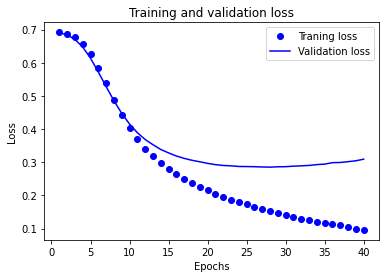

In [0]:
# x축은 반복학습된 수, y는 손실율.
# 'bo' 는 "파란색 점" 입니다.
plt.plot(epochs, loss, 'bo', label = 'Traning loss')
# b 는 "파란실선" 입니다.
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

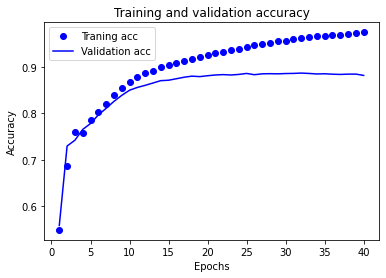

In [0]:
# 이번엔 정확도 차트를 그려보자
plt.clf()  # 그림을 초기화 한다.

plt.plot(epochs, acc, 'bo', label = 'Traning acc')
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
# 훈련손실은 에포크마다 감소하고 훈련 정화도는 증가 한다는것을 보인다.
# 검사 하강법 최적하를 사용할 때 볼 수 있는 현상  매 반복마다최적화 대상의 값을 최소화 
# 하지만 검증 손실과 검증 정확도에서는 약 20번째 에포크 이후가 최적점 이는 과대적합 떄문
# 이 지점부터는 모델이 과도하게 최적화 되어.
# 테스트 데이터에서 일반화 되기 어려운 훈련 데이터의 특정 표현을 학습합니다.
# 그래서 튜닝을 적절하게 해주고 반복하는 작업으로 모델을 개선 해 나간다.